In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

In [3]:
train_df = pd.read_csv('./digit-recognizer/train.csv')
test_df = pd.read_csv('./digit-recognizer/test.csv')

In [4]:
train_df.shape, test_df.shape


((42000, 785), (28000, 784))

In [5]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0)

In [34]:
train_label = train_df['label'].value_counts()
px.bar(train_label, x= train_label.index, y='Count', title='Count of each label')

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['label'] but received: Count

In [37]:
train_label = train_df['label'].value_counts().reset_index()
train_label.columns = ['label', 'count']
fig = px.bar(train_label, x='label', y='count', title='Count of each label')
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.show()


In [9]:
X_train = (train_df.drop(['label'], 1).values).astype('float32')
y_train = (train_df['label'].values).astype('int32')

/var/folders/3s/typ7cmgs2gz1qrxghyfqx8j80000gn/T/ipykernel_99778/2009907213.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = (train_df.drop(['label'], 1).values).astype('float32')


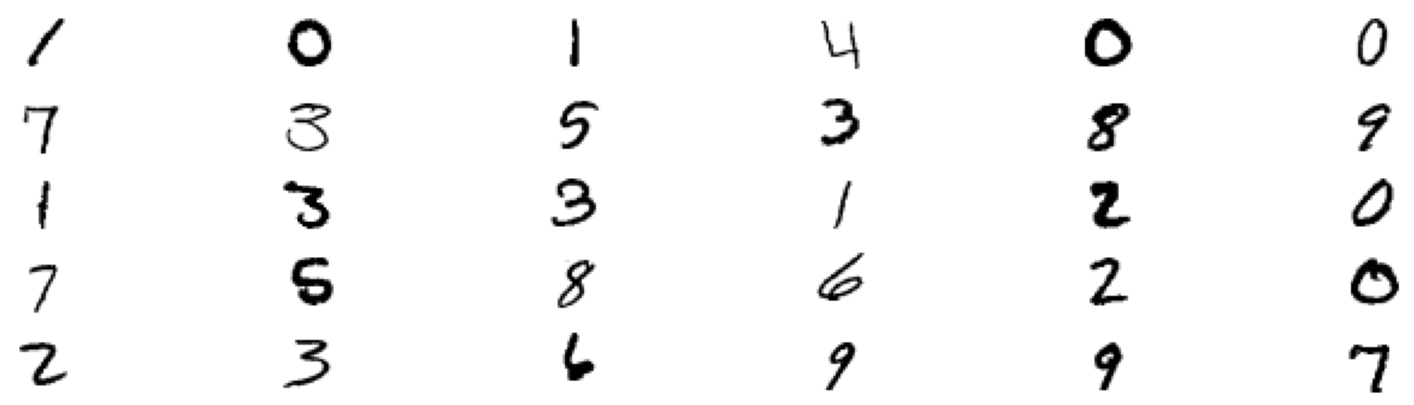

In [38]:
for_visual = train_df.drop('label',axis=1).values

# image visualization
plt.figure(figsize=(20,5))
for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.imshow(for_visual[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')

In [39]:
from keras.utils.np_utils import to_categorical

In [40]:
# X stands for features
X = train_df.drop('label',axis=1)
# Reshape the form of original dataset
X = X.values.reshape(42000,28,28,1)

# y stands for labels (target value)
y = train_df['label']

y = to_categorical(y, num_classes = 10)

test_df = test_df.values.reshape(28000,28,28,1)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=116)


In [44]:
from keras.callbacks import EarlyStopping
from keras_preprocessing.image import ImageDataGenerator

In [46]:
# image generator
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

# validation image generator
validation_datagen = ImageDataGenerator(rescale = 1./255)


In [47]:
training_datagen.fit(X_train)

validation_datagen.fit(X_val)

In [48]:
training_datagen = training_datagen.flow(X_train, y_train, batch_size=128)
validation_datagen = validation_datagen.flow(X_val, y_val, batch_size = 128)

In [49]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3, 3), activation='relu'))

model.add(tf.keras.layers.Conv2D(128,kernel_size=(3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         73856     
                                                        

In [50]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 10,
                                                  min_delta = 0.0001,
                                                  verbose = 1,
                                                  monitor = 'val_loss',
                                                  mode = 'auto',
                                                  restore_best_weights = True)

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
history = model.fit(training_datagen,
                    validation_data = validation_datagen,
                    epochs=40,
                    verbose = 1,
                    validation_steps=3,
                    callbacks=[early_stopping])

Epoch 1/40


2023-04-01 20:35:52.466576: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


230/230 [==============================] - 13s 54ms/step - loss: 0.7412 - accuracy: 0.7502 - val_loss: 0.2212 - val_accuracy: 0.9323
Epoch 2/40
230/230 [==============================] - 12s 52ms/step - loss: 0.2653 - accuracy: 0.9164 - val_loss: 0.1294 - val_accuracy: 0.9479
Epoch 3/40
230/230 [==============================] - 13s 56ms/step - loss: 0.1819 - accuracy: 0.9424 - val_loss: 0.0588 - val_accuracy: 0.9818
Epoch 4/40
230/230 [==============================] - 13s 55ms/step - loss: 0.1374 - accuracy: 0.9576 - val_loss: 0.0660 - val_accuracy: 0.9818
Epoch 5/40
230/230 [==============================] - 13s 55ms/step - loss: 0.1241 - accuracy: 0.9607 - val_loss: 0.0753 - val_accuracy: 0.9792
Epoch 6/40
230/230 [==============================] - 13s 57ms/step - loss: 0.1057 - accuracy: 0.9664 - val_loss: 0.0226 - val_accuracy: 0.9922
Epoch 7/40
230/230 [==============================] - 13s 56ms/step - loss: 0.0963 - accuracy: 0.9692 - val_loss: 0.0796 - val_accuracy: 0.9714
Epo

In [52]:
epoch = history.epoch

color = ['#67001f','#b2182b','#4393c3','#2166ac']

fig1 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['accuracy'],line_color=color[0],name='1.train_accuracy score'),

    go.Line(x = epoch, y = history.history['val_accuracy'],line_color=color[3],name='2.val_accuracy score')
])

fig2 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['loss'],line_color = color[1],name='3.train_loss'),

    go.Line(x = epoch, y = history.history['val_loss'], line_color = color[2],name='4.val_loss')
])

figures = [fig1,fig2]
title = ['Accuracy & Validation Accuracy Score','Loss & Validation Loss Score']
fig = make_subplots(cols=len(figures),
                   subplot_titles=(title[0], title[1]))

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)

fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)

fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(template = "simple_white", title = 'Accuracy & LOSS',
                 font = dict(size=17, family = 'Franklin Gothic'))

/Users/kinhanglo/Desktop/machine-learning/Machine-Learning-environment/env/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [54]:
result = model.predict(test_df)
result

875/875 [==============================] - 4s 5ms/step


array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [61]:
classes = np.argmax(result,axis = 1)
sample_submission = pd.read_csv('./digit-recognizer/sample_submission.csv')


In [62]:
sample_submission['Label'] = classes


In [63]:
sample_submission.to_csv('submission.csv',index=False)
